<a href="https://colab.research.google.com/github/Hwarriach/Deep_Neural_Network/blob/main/MNIST_handwritten_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the data**

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [5]:
print(' Train: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Test: X = {}, y = {}'.format(X_test.shape, y_test.shape))

 Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


# **EDA**

In [6]:
X_train[0].shape

(28, 28)

In [17]:
# Scaling dataset from range of 0-255 to a range of 0-1 to improve model accuracy

X_train = X_train /255
X_test = X_test /255

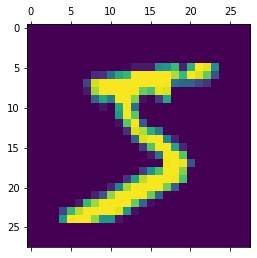

In [18]:
# visualizing 

plt.matshow(X_train[0])

In [19]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape


(60000, 784)

# **Model Construction**

In [20]:
# Training

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
     )

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4752 - accuracy: 0.8760
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [21]:
# Evaluating accuracy

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2630 - accuracy: 0.9275


[0.2629902958869934, 0.9275000095367432]

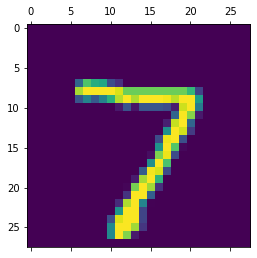

In [22]:
# Sample prediction

plt.matshow(X_test[0])

In [24]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([4.5787692e-03, 1.4343747e-08, 1.4952689e-02, 9.6968317e-01,
       1.0326505e-03, 1.4359307e-01, 3.8411272e-08, 9.9984038e-01,
       8.1189752e-02, 6.4650685e-01], dtype=float32)

In [25]:
np.argmax(y_pred[0])

7

 **Confusion Matrix**

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    6,    3,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   5,    9,  921,   21,    7,    4,   12,   11,   37,    5],
       [   3,    0,   14,  935,    0,   21,    3,   10,   19,    5],
       [   1,    1,    5,    2,  917,    0,    8,    4,   10,   34],
       [   9,    2,    2,   39,    7,  781,   12,    8,   28,    4],
       [   9,    3,    9,    1,    7,   14,  911,    2,    2,    0],
       [   1,    6,   21,    8,    5,    1,    0,  951,    3,   32],
       [   7,    9,    5,   29,    9,   31,    9,    9,  857,    9],
       [  11,    7,    1,   13,   22,    6,    0,   19,    4,  926]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

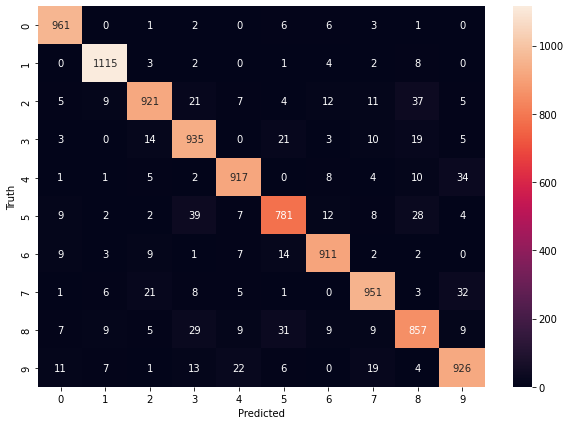

In [28]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Adding hidden layer to model in order to improve performance**

In [29]:
# Train Model with a new layer and using 'relu' as first activation

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
     )

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2723 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [30]:
# Evaluate model

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9783


[0.076264888048172, 0.9782999753952026]